In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import subroutines.ExtractData as ED
import scipy.fftpack
import subroutines.QuickView as QV

In [2]:
Freq1 = ED.extract('Data_Peakfinder/frequency_sample1.txt')
Magn1 = ED.extract('Data_Peakfinder/S21_magn_sample1.txt')

In [6]:
PeakFrequencies = np.array([5.10,5.636,6.15,6.42,6.65,6.93,7.16,7.45,7.67]) #Location of the frequencies in GHz
print(PeakFrequencies)
Npeaks = len(PeakFrequencies)
SectionHalfWidth = 0.05 #Halfwidth of the section under investigation in GHz

[ 5.1    5.636  6.15   6.42   6.65   6.93   7.16   7.45   7.67 ]


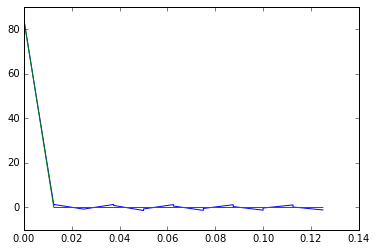

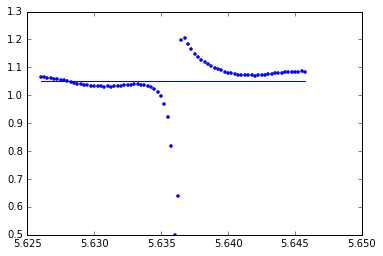

In [7]:
PeakHalfWidth = 0.01
FrangeIdx = QV.GetFrequencyRange(Freq1,Fc=PeakFrequencies[1],HalfWidth=PeakHalfWidth)
    
#Almost all suffer from a standing wave pattern
w = scipy.fftpack.rfft(Magn1[FrangeIdx])
f = scipy.fftpack.rfftfreq(int(np.sum(FrangeIdx)))
spectrum = w**2

cutoff_idx = spectrum < (spectrum.max()/5)
w2 = w.copy()
w2[cutoff_idx] = 0

Nmax = 20
plt.plot(f[:Nmax],w[:Nmax])
plt.plot(f[:Nmax],w2[:Nmax])
plt.show()

y2 = scipy.fftpack.irfft(w2)

plt.plot(Freq1[FrangeIdx],Magn1[FrangeIdx],'b.')
plt.plot(Freq1[FrangeIdx],y2)
plt.show()